In [5]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Prediction system to predict which user is going to buy a product displayed on a social media advertisement using random forest classification.

In [13]:
data=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/KNN-projects/master/Social_Network_Ads.csv',index_col=0)
data.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


In [14]:
#Lets print Summary dataset

In [15]:
data.shape

(400, 4)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 15624510 to 15594041
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 15.6 KB


In [17]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [18]:
#Lets see Frequency using value counts

In [30]:
data.Purchased.value_counts()#Its not a imbalanced dataset

0    257
1    143
Name: Purchased, dtype: int64

In [22]:
#Lets plot in graph using counplot 

In [27]:
data['Gender']=data['Gender'].replace({'Male':0,'Female':1})

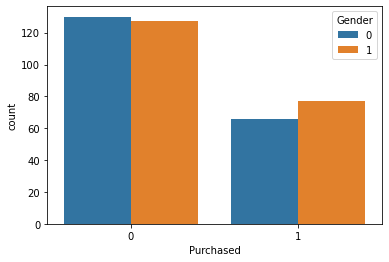

In [28]:
sns.countplot(x='Purchased',data=data,hue='Gender')
plt.show()

In [31]:
#There are no null values . and we  are good to go

In [32]:
#Lets Create MOdel


In [36]:
x=data.drop('Purchased',axis=1)
y=data.Purchased

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [38]:
scaler=StandardScaler()

In [39]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=942255)

In [43]:
def metric_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("====================Training Score=============")
        print("Accuracy Score ==>  ",accuracy_score(y_train,y_pred))
    elif train== False:
        pred=cnn.predict(x_test)
        print("==================Test Score==============")
        print("Accuracy Score ==> ",accuracy_score(y_test,pred)*100)
        print("Classification Report====>",classification_report(y_test,pred))

In [44]:
knn=KNeighborsClassifier()

In [46]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

====================Training Score=============
Accuracy Score ==>   0.9133333333333333
==================Test Score==============
Accuracy Score ==>  95.0
Classification Report====>               precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.92      0.94      0.93        36

    accuracy                           0.95       100
   macro avg       0.94      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [51]:
#Lets Checking my model is overfitted or no


In [52]:
from sklearn.model_selection import KFold,cross_val_score


In [54]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=4).mean()

0.9049999999999999

In [55]:
#Its means our model is not overfitted

In [56]:
#Lets check Hyperparameter Tuning


In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
best_param={'algorithm':['kd_tree','brute'],
           'leaf_size':[3,4,5,6,9,4],
           'n_neighbors':[4,5,6,1,2,3,4]}

In [59]:
grid_search=GridSearchCV(estimator=knn,param_grid=best_param)

In [60]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 4, 5, 6, 9, 4],
                         'n_neighbors': [4, 5, 6, 1, 2, 3, 4]})

In [62]:
grid_search.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 6}

In [65]:
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=6)

In [67]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=6)

In [68]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

====================Training Score=============
Accuracy Score ==>   0.9133333333333333
==================Test Score==============
Accuracy Score ==>  95.0
Classification Report====>               precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.92      0.94      0.93        36

    accuracy                           0.95       100
   macro avg       0.94      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [69]:
#Our model is good .

In [ ]:
#Student of DataScience 
#Student of DataTrained - Saurav
#Date - 9/08/2022
#Time - 9:45